In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name() # 한글 처리
rc('font', family=font_name)

In [23]:
df=pd.read_csv("d:/data/wine/wine_new.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

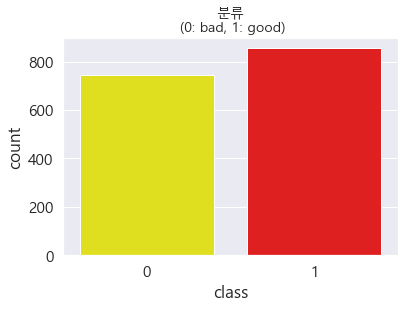

In [24]:
import seaborn as sns

colors=['yellow','red']
sns.countplot('class', data=df, palette=colors)
plt.title("분류\n (0: bad, 1: good)", fontsize=14)
# 불균형 데이터셋

In [25]:
train_cols=df.columns[0:11] # 0~10 필드
print(train_cols)
X=df[train_cols]
y=df["class"]
print(df[train_cols].head())
print(y.head())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  47.0  1.00080  3.25       0.57   
1                  5.0                  16.0  0.99940  3.16       0.63   
2                  5.0                  14.0  0.99660  3.63       0.54   
3                 34

In [26]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample, columns=train_cols)
y_samp=pd.DataFrame(data=y_sample, columns=['class'])
df2=pd.concat([X_samp,y_samp], axis=1)

In [27]:
# 오버샘플링
from imblearn.over_sampling import SMOTE
X_sample, y_sample=SMOTE(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample, columns=train_cols)
y_samp=pd.DataFrame(data=y_sample, columns=['class'])
df2=pd.concat([X_samp,y_samp], axis=1)

In [28]:
df2["class"].value_counts()

0    855
1    855
Name: class, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

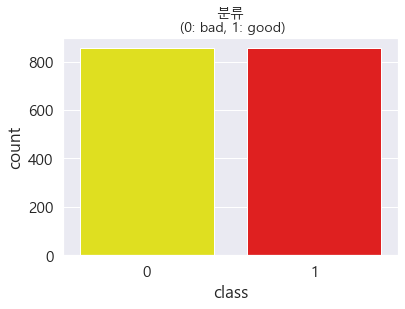

In [29]:
import seaborn as sns
colors=['yellow','red']
sns.countplot('class', data=df2, palette=colors)
plt.title("분류\n (0: bad, 1: good)", fontsize=14)

In [30]:
train_cols=df.columns[0:11]
X=df[train_cols]
y=df["class"]

In [31]:
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())
# 모델의 설명력 25.0%
# 유의하지 않은 변수들 : fixed acidity, residual sugar, pH
# 상관관계 : density(-)[도수] > chlorides(-)[염화물] > volatile acidity(-)[휘발성 산도] > sulphates(+)[황산염]

Optimization terminated successfully.
         Current function value: 0.517798
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.250      
Dependent Variable:  class             AIC:               1677.9172  
Date:                2021-12-08 19:59  BIC:               1737.0656  
No. Observations:    1599              Log-Likelihood:    -827.96    
Df Model:            10                LL-Null:           -1104.5    
Df Residuals:        1588              LLR p-value:       1.9883e-112
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed acidity         0.0952   0.0632  1.5075 0.1317  -0.0286  0.2190
volatile acidity

In [32]:
# pvalue가 0.05보다 큰 값들을 제거
cols=['volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'sulphates', 'alcohol']

X=X_samp[cols]
y=y_samp['class']
df2=pd.concat([X,y], axis=1)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
print('학습용 :',model.score(X_train, y_train))
print('검증용 :',model.score(X_test, y_test))

학습용 : 0.7426900584795322
검증용 : 0.7309941520467836


In [35]:
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[138,  35],
       [ 57, 112]], dtype=int64)

In [36]:
df_cm=pd.DataFrame(cm, index=[0,1], columns=[0,1])
df_cm

,0,1
0,138,35
1,57,112


<AxesSubplot:title={'center':'Confusion Matrix'}>

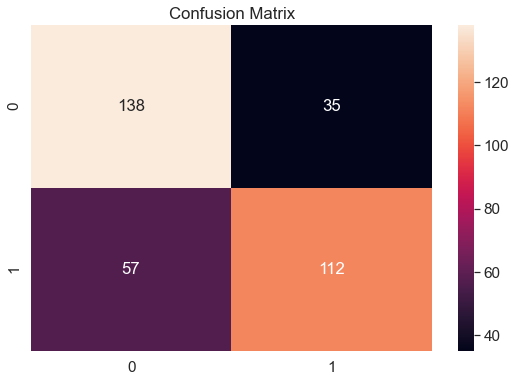

In [37]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True, fmt='d')